# Library Import

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data and Return Dataframes

In [70]:
countries=["Argentina", "Thailand", "Iraq", "United Kingdom", "United States", "World", "Zimbabwe"]
indicator=["Electricity production from coal sources (% of total)", "CO2 emissions (kt)"]
print(*countries, sep=", ")

Argentina, Thailand, Iraq, United Kingdom, United States, World, Zimbabwe


In [20]:
def dataframereader(fl_name):
    data=open(fl_name,"r+").read()     # read data in WB format
    data=data[85:]
    dataframe=open("file.csv","w+").write(data)    # store temp data
    dataframe=pd.read_csv("file.csv")
    dataframe=dataframe.fillna(dataframe.mean())
    yrcols=dataframe.columns.tolist()[4:-1]    # take year columns
    dataframe=dataframe[(dataframe['Indicator Name']==indicator[0])|((dataframe['Indicator Name']==indicator[1]))]    # filter data by indicator
    fltr=dataframe['Country Name'].isin(countries)
    dataframe=dataframe[fltr]
    cntr=dataframe['Country Name'].tolist()
    indx=dataframe['Indicator Name'].tolist()
    d1=[]
    for i in range(len(indx)):
        d1.append(cntr[i]+"-"+indx[i])    # craeting new column by conbining country and indicator
    dataframe.insert(4,"Country with Indicator",d1)
    dataframe1=dataframe.T.iloc[4:][:-1]
    # drop unnecessary features
    dataframe=dataframe.reset_index(drop=True).drop(['Unnamed: 65','Country Code','Indicator Code','Country with Indicator'],axis=1)
    dataframe1.columns=dataframe1.iloc[0]
    dataframe1=dataframe1.iloc[1:]
    dataframe1['Year']=yrcols
    dataframe1=dataframe1.set_index("Year")
    return dataframe,dataframe1  

In [21]:
df,df1=dataframereader("API_19_DS2_en_csv_v2_3931355.csv")

In [22]:
df.head()   # First Data with Year Column

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,CO2 emissions (kt),4.881510e+04,5.118032e+04,5.369588e+04,5.008389e+04,5.572740e+04,5.886635e+04,6.313841e+04,6.554396e+04,...,177260.000000,178530.000000,184000.000000,179910.000000,186090.000000,1.842800e+05,1.801200e+05,1.774100e+05,3.435867e+07,4.320922e+07
1,Argentina,Electricity production from coal sources (% of...,2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,...,2.835861,2.920510,2.548929,2.217284,2.029567,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
2,United Kingdom,CO2 emissions (kt),5.842998e+05,5.889385e+05,5.933609e+05,6.038229e+05,6.083553e+05,6.226199e+05,6.185642e+05,5.925175e+05,...,444420.000000,467080.000000,453060.000000,414850.000000,400370.000000,3.788900e+05,3.663800e+05,3.588000e+05,3.435867e+07,4.320922e+07
3,United Kingdom,Electricity production from coal sources (% of...,8.108585e+01,8.020728e+01,8.001422e+01,7.991393e+01,7.864149e+01,7.449733e+01,7.218464e+01,7.078989e+01,...,30.062958,40.051502,37.049790,30.311698,22.806491,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
4,Iraq,CO2 emissions (kt),8.265418e+03,8.720126e+03,9.031821e+03,9.394854e+03,9.075825e+03,1.931409e+04,2.770419e+04,1.839367e+04,...,131030.000000,151860.000000,162550.000000,168840.000000,162190.000000,1.723500e+05,1.742900e+05,1.881400e+05,3.435867e+07,4.320922e+07


In [23]:
df1.head()   # second data with country column

Country with Indicator,Argentina-CO2 emissions (kt),Argentina-Electricity production from coal sources (% of total),United Kingdom-CO2 emissions (kt),United Kingdom-Electricity production from coal sources (% of total),Iraq-CO2 emissions (kt),Iraq-Electricity production from coal sources (% of total),Thailand-CO2 emissions (kt),Thailand-Electricity production from coal sources (% of total),United States-CO2 emissions (kt),United States-Electricity production from coal sources (% of total),World-CO2 emissions (kt),World-Electricity production from coal sources (% of total),Zimbabwe-CO2 emissions (kt),Zimbabwe-Electricity production from coal sources (% of total)
Year,,,,,,,,,,,,,,
1960,48815.104,20159401.163406,584299.78,81.085853,8265.418,20159401.163406,3714.671,20159401.163406,2890696.1,53.912007,9463838.499902,20159401.163406,20159401.163406,20159401.163406
1961,51180.319,14768896.898304,588938.535,80.207283,8720.126,14768896.898304,4147.377,14768896.898304,2880505.507,53.730535,9423934.423683,14768896.898304,14768896.898304,14768896.898304
1962,53695.881,14888963.885678,593360.937,80.014219,9031.821,14888963.885678,5034.791,14888963.885678,2987207.873,53.250202,9732505.890225,14888963.885678,14888963.885678,14888963.885678
1963,50083.886,16420743.87221,603822.888,79.913934,9394.854,16420743.87221,5570.173,16420743.87221,3119230.874,54.390065,10274503.991073,16420743.87221,16420743.87221,16420743.87221
1964,55727.399,16886643.335033,608355.3,78.641493,9075.825,16886643.335033,7480.68,16886643.335033,3255995.306,54.015362,10820253.007307,16886643.335033,4473.74,16886643.335033


# Data Analysis

In [24]:
ep,c2=[],[]
for i in range(len(countries)):
    dft=df[df['Country Name']==countries[i]]
    dft=dft.drop('Indicator Name',axis=1)
    ep.append(round(dft.iloc[0,1:].median(),2))
    c2.append(round(dft.iloc[1,1:].median(),2))
print("----------------------------------------------------------------")
print("             Statistics for Electricity production")
print("----------------------------------------------------------------")
for i in range(len(c2)):
    print("    Electricity production for {} => {}".format(countries[i],ep[i]))
print("----------------------------------------------------------------")
print("----------------------------------------------------------------")
print("             Statistics for CO2 emissions")
print("----------------------------------------------------------------")
for i in range(len(ep)):
    print("    CO2 emissions for {} => {}".format(countries[i],c2[i]))
print("----------------------------------------------------------------")

----------------------------------------------------------------
             Statistics for Electricity production
----------------------------------------------------------------
    Electricity production for Argentina => 111030.0
    Electricity production for Thailand => 88560.0
    Electricity production for Iraq => 64850.0
    Electricity production for United Kingdom => 556690.0
    Electricity production for United States => 4888640.0
    Electricity production for World => 21429383.16
    Electricity production for Zimbabwe => 10868.99
----------------------------------------------------------------
----------------------------------------------------------------
             Statistics for CO2 emissions
----------------------------------------------------------------
    CO2 emissions for Argentina => 2.37
    CO2 emissions for Thailand => 20.54
    CO2 emissions for Iraq => 0.0
    CO2 emissions for United Kingdom => 63.94
    CO2 emissions for United States => 52.45
    CO

In [25]:
statdf=pd.DataFrame({"Country":countries,"Electricity production":ep,"CO2 emissions":c2})
statdf=statdf.sort_values(by="Electricity production")
statdf=statdf.set_index("Country")
statdf

,Electricity production,CO2 emissions
Country,,
Zimbabwe,10868.99,54.44
Iraq,64850.00,0.00
Thailand,88560.00,20.54
Argentina,111030.00,2.37
United Kingdom,556690.00,63.94
United States,4888640.00,52.45
World,21429383.16,38.64


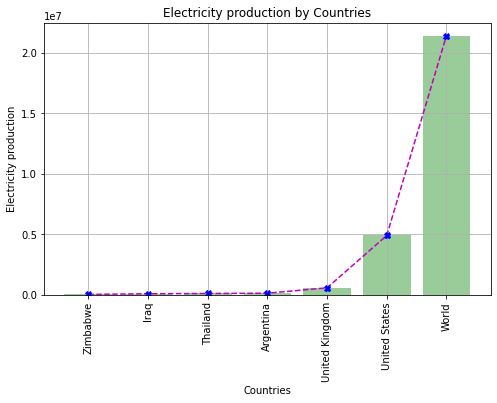

In [26]:
plt.figure(figsize=(8,5))
plt.title("Electricity production by Countries")
plt.plot(statdf['Electricity production'],"m--")
plt.plot(statdf['Electricity production'],"Xb")
plt.bar(statdf.index,statdf['Electricity production'],alpha=0.4,color="g")
plt.xlabel("Countries")
plt.xticks(rotation=90)
plt.ylabel("Electricity production")
plt.grid()
plt.show()

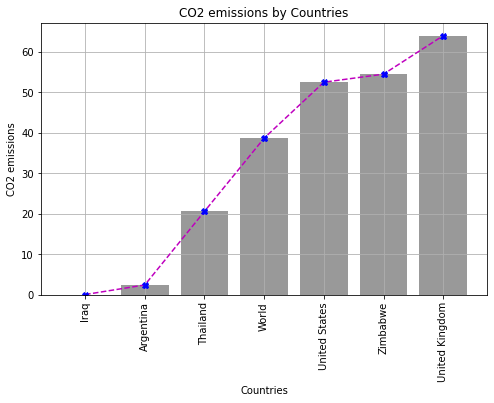

In [27]:
statdf=statdf.sort_values(by='CO2 emissions')
plt.figure(figsize=(8,5))
plt.title("CO2 emissions by Countries")
plt.plot(statdf['CO2 emissions'],"m--")
plt.plot(statdf['CO2 emissions'],"Xb")
plt.bar(statdf.index,statdf['CO2 emissions'],alpha=0.4,color="k")
plt.xlabel("Countries")
plt.xticks(rotation=90)
plt.ylabel("CO2 emissions")
plt.grid()
plt.show()

<AxesSubplot:>

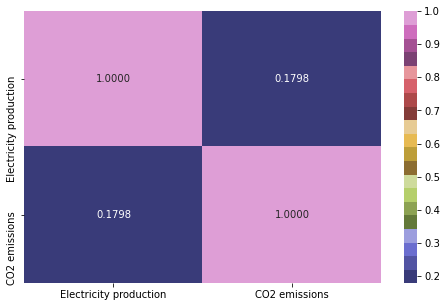

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(statdf.corr(),annot=True,fmt="0.4f",cmap="tab20b")

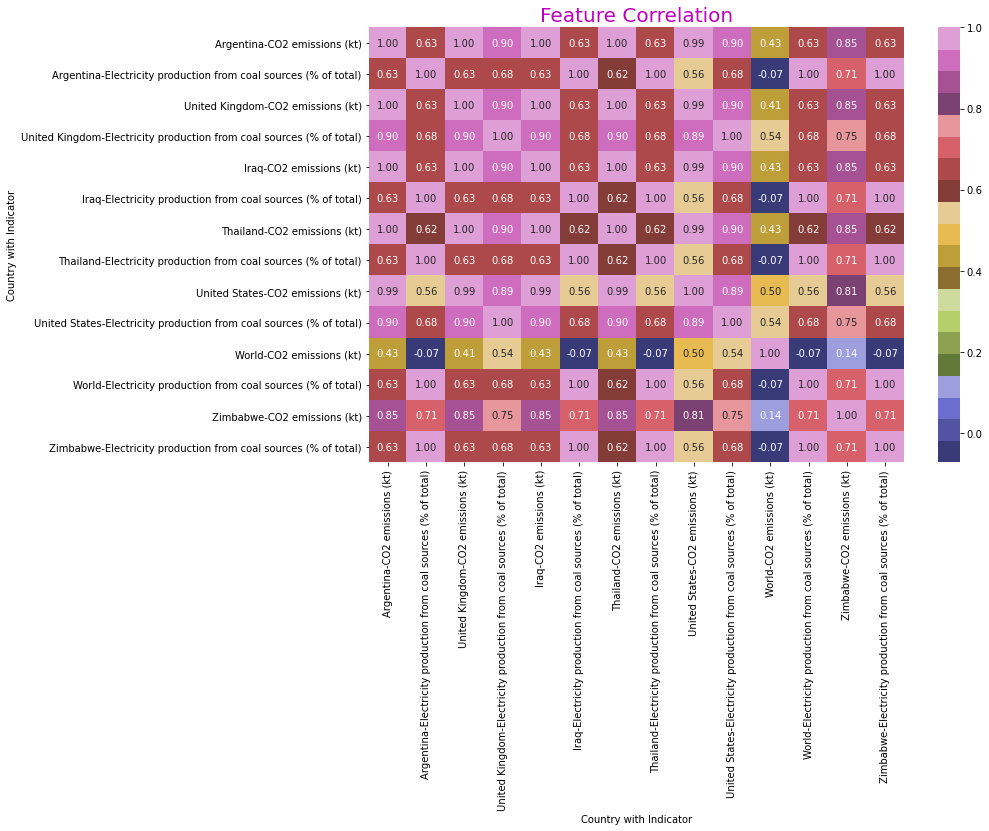

In [29]:
df1cols=df1.columns
df1idx=df1.index
df1arr=np.array(df1.values,float)
df1=pd.DataFrame(df1arr,columns=df1cols,index=df1idx)
plt.figure(figsize=(12,8))
plt.title("Feature Correlation",fontsize=20,color="m")
sns.heatmap(df1.corr(),annot=True,fmt="0.2f",cmap="tab20b")
plt.show()

In [35]:
df.head()

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Argentina,CO2 emissions (kt),4.881510e+04,5.118032e+04,5.369588e+04,5.008389e+04,5.572740e+04,5.886635e+04,6.313841e+04,6.554396e+04,...,177260.000000,178530.000000,184000.000000,179910.000000,186090.000000,1.842800e+05,1.801200e+05,1.774100e+05,3.435867e+07,4.320922e+07
1,Argentina,Electricity production from coal sources (% of...,2.015940e+07,1.476890e+07,1.488896e+07,1.642074e+07,1.688664e+07,1.753013e+07,1.965494e+07,1.971973e+07,...,2.835861,2.920510,2.548929,2.217284,2.029567,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
2,United Kingdom,CO2 emissions (kt),5.842998e+05,5.889385e+05,5.933609e+05,6.038229e+05,6.083553e+05,6.226199e+05,6.185642e+05,5.925175e+05,...,444420.000000,467080.000000,453060.000000,414850.000000,400370.000000,3.788900e+05,3.663800e+05,3.588000e+05,3.435867e+07,4.320922e+07
3,United Kingdom,Electricity production from coal sources (% of...,8.108585e+01,8.020728e+01,8.001422e+01,7.991393e+01,7.864149e+01,7.449733e+01,7.218464e+01,7.078989e+01,...,30.062958,40.051502,37.049790,30.311698,22.806491,1.352424e+07,1.553889e+07,1.709443e+07,3.435867e+07,4.320922e+07
4,Iraq,CO2 emissions (kt),8.265418e+03,8.720126e+03,9.031821e+03,9.394854e+03,9.075825e+03,1.931409e+04,2.770419e+04,1.839367e+04,...,131030.000000,151860.000000,162550.000000,168840.000000,162190.000000,1.723500e+05,1.742900e+05,1.881400e+05,3.435867e+07,4.320922e+07


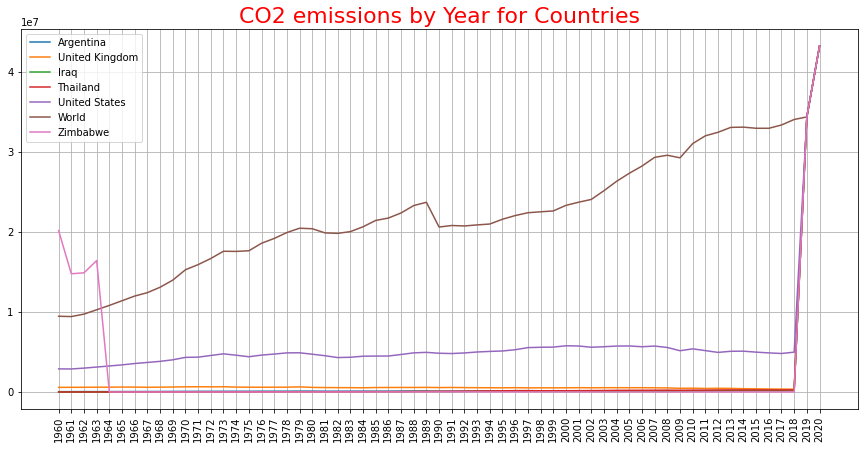

In [68]:
plt.figure(figsize=(15,7))
plt.title("CO2 emissions by Year for Countries",fontsize=22,color="r")
for i in range(0,len(df),2):
    plt.plot(df.iloc[i,2:],label=df.iloc[i,0])
    #plt.plot(df.iloc[i+1,2:],label=df.iloc[i,0])
    plt.xticks(rotation=90)
plt.grid()
plt.legend(loc="best")
plt.show()

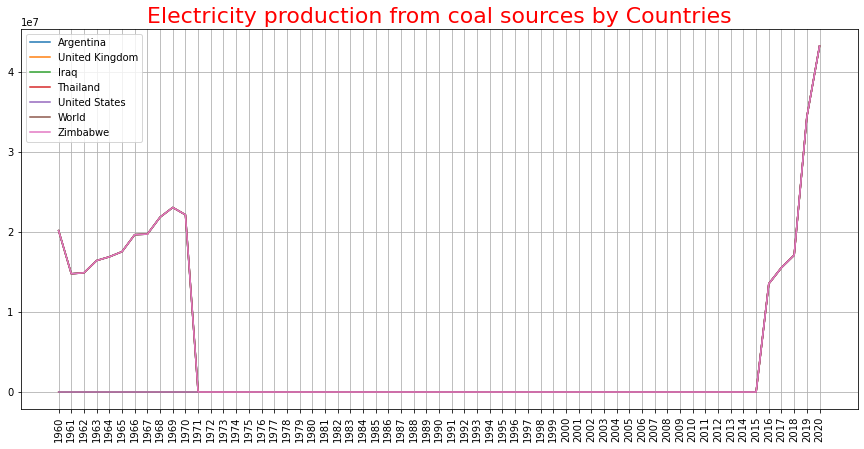

In [69]:
plt.figure(figsize=(15,7))
plt.title("Electricity production from coal sources by Countries",fontsize=22,color="r")
for i in range(0,len(df),2):
    plt.plot(df.iloc[i+1,2:],label=df.iloc[i,0])
    plt.xticks(rotation=90)
plt.grid()
plt.legend(loc="best")
plt.show()